<p>About dataset</p>
<p>Mall unlabelled dataset have to predict customer segments</p>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../CSV/mall.csv")

In [4]:
df.head()

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163


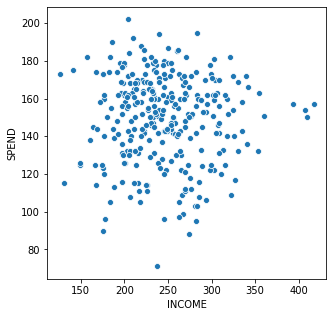

In [7]:
plt.figure(figsize=(5,5))
sns.scatterplot(df["INCOME"],df["SPEND"])
plt.show()

### KMeans Baseline model

In [8]:
from sklearn.cluster import KMeans

In [12]:
ke1 = KMeans(n_clusters=3, n_init=10, max_iter=300, random_state=1)

In [55]:
ke1.fit(df)

KMeans(n_clusters=3, random_state=1)

In [56]:
ke1.inertia_

297101.37642019405

In [57]:
centroids = ke1.cluster_centers_
centroids
# arroy([x,y])

array([[317.55      , 148.73333333],
       [196.68224299, 150.57943925],
       [251.61764706, 149.31617647]])

In [58]:
centroid_df = pd.DataFrame(centroids,columns=["X","Y"])

In [59]:
centroid_df

,X,Y
0,317.550000,148.733333
1,196.682243,150.579439
2,251.617647,149.316176


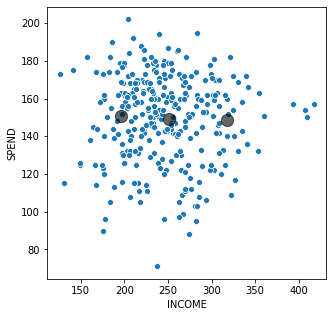

In [60]:
plt.figure(figsize=(5,5))
sns.scatterplot(df["INCOME"],df["SPEND"])
plt.scatter(centroid_df["X"],centroid_df["Y"], c='black',s=150, alpha=0.6);
plt.show()

### K values and Elbow method


In [69]:
wcss = []

for k in range(1,11):
    ke2 = KMeans(n_clusters=k, init="k-means++", n_init=10, max_iter=300,random_state=1)
    ke2.fit(df)
    wcss.append(ke2.inertia_)

In [70]:
wcss

[868805.4785478542,
 416914.67764462077,
 297101.37642019405,
 235568.75630353525,
 193593.35865221676,
 159447.00296038037,
 134366.77764348575,
 115322.48109450452,
 100960.72043885467,
 90453.40060727765]

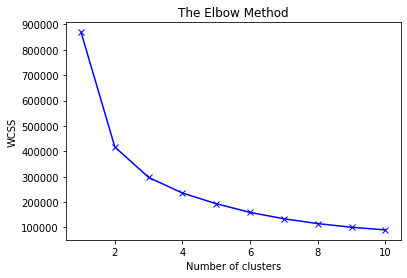

In [71]:
plt.plot(range(1,11),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Final model
<p>Train and Predict</p>

In [73]:
ke3 = KMeans(n_clusters=5, init="k-means++", n_init=10, max_iter=300,random_state=1)

In [74]:
labels = ke3.fit_predict(df)

In [75]:
# wcss
ke3.inertia_

193593.35865221676

In [76]:
centroids = ke3.cluster_centers_
centroids

array([[248.97196262, 158.82242991],
       [271.64705882, 114.94117647],
       [194.68085106, 125.70212766],
       [321.34615385, 153.23076923],
       [199.71428571, 167.6984127 ]])

In [77]:
centroid_df = pd.DataFrame(centroids,columns=["X","Y"])
centroid_df

,X,Y
0,248.971963,158.822430
1,271.647059,114.941176
2,194.680851,125.702128
3,321.346154,153.230769
4,199.714286,167.698413


In [78]:
labels

array([0, 0, 4, 0, 3, 4, 3, 0, 4, 4, 0, 1, 0, 2, 0, 4, 3, 2, 0, 0, 0, 0,
       4, 0, 4, 3, 4, 2, 3, 4, 4, 2, 4, 0, 2, 4, 3, 0, 0, 3, 3, 0, 4, 0,
       3, 3, 0, 0, 2, 0, 0, 3, 0, 4, 0, 4, 4, 0, 4, 3, 1, 3, 4, 2, 4, 4,
       0, 0, 4, 4, 0, 0, 4, 0, 4, 0, 0, 4, 4, 0, 0, 3, 3, 3, 1, 0, 0, 4,
       4, 1, 0, 4, 4, 3, 2, 2, 3, 0, 3, 0, 0, 0, 4, 0, 4, 2, 0, 0, 0, 0,
       3, 4, 3, 4, 0, 4, 4, 4, 4, 0, 1, 0, 0, 0, 4, 4, 2, 0, 4, 1, 4, 0,
       3, 0, 3, 0, 2, 2, 2, 1, 3, 3, 4, 0, 2, 0, 0, 0, 0, 4, 0, 2, 0, 0,
       4, 2, 0, 4, 4, 4, 0, 3, 4, 4, 4, 1, 2, 0, 0, 4, 0, 0, 0, 4, 2, 2,
       0, 3, 2, 1, 3, 2, 3, 0, 0, 3, 0, 1, 0, 4, 3, 2, 2, 1, 4, 3, 0, 0,
       1, 0, 4, 0, 1, 0, 2, 0, 0, 0, 2, 4, 0, 0, 2, 3, 0, 3, 1, 3, 1, 0,
       3, 2, 0, 1, 0, 2, 1, 2, 3, 3, 0, 1, 3, 1, 3, 3, 3, 3, 3, 0, 1, 0,
       2, 1, 2, 0, 3, 1, 0, 0, 1, 0, 1, 1, 1, 3, 1, 2, 0, 0, 0, 0, 1, 0,
       2, 2, 3, 2, 1, 1, 0, 0, 1, 0, 1, 4, 2, 0, 3, 2, 3, 4, 2, 4, 2, 3,
       4, 0, 3, 2, 4, 3, 0, 4, 2, 2, 2, 2, 1, 1, 2,

In [47]:
labels = pd.DataFrame({'labels':labels})

In [50]:
df_new = pd.concat([df, labels], axis=1)

In [51]:
df_new.head()

,INCOME,SPEND,labels
0,233,150,0
1,250,187,0
2,204,172,4
3,236,178,0
4,354,163,3


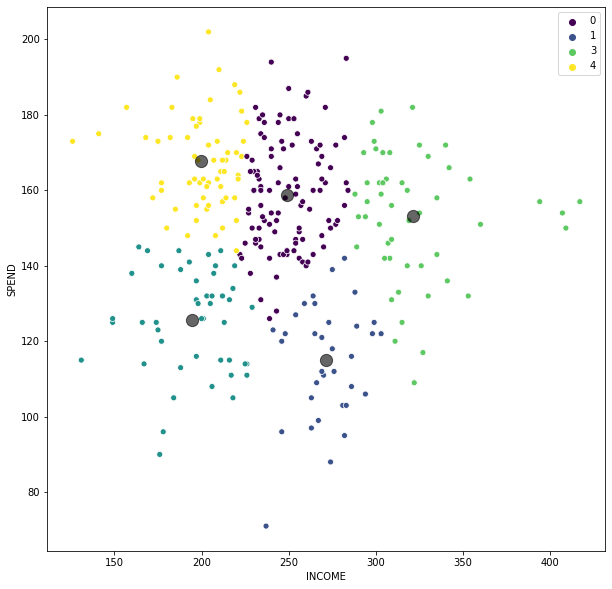

In [83]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=df["INCOME"],y=df["SPEND"],hue=labels,palette="viridis")
plt.scatter(centroid_df["X"],centroid_df["Y"], c='black',s=150, alpha=0.6);
plt.show()